## Load libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

%matplotlib inline

In [3]:
# For displaying multiple outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Load data

In [4]:
image_dir = '/home/gaurav/datasets/agri/Tomato_Classifier/MultiClassData/'

healthy_images_dir = image_dir + 'Tomato___healthy/'
bacterial_spot_images_dir = image_dir + 'Tomato___Bacterial_spot/'
early_blight_images_dir = image_dir + 'Tomato___Early_blight/'
late_blight_images_dir = image_dir + 'Tomato___Late_blight/'
leaf_mold_images_dir = image_dir + 'Tomato___Leaf_Mold/'
septoria_leaf_spot_images_dir = image_dir + 'Tomato___Septoria_leaf_spot/'
two_spotted_spider_mites_images_dir = image_dir + 'Tomato___Spider_mites_Two_spotted_spider_mite/'
target_spot_images_dir = image_dir + 'Tomato___Target_Spot/'
mosaic_virus_images_dir = image_dir + 'Tomato___Tomato_mosaic_virus/'
yellow_leaf_curl_virus_images_dir = image_dir + 'Tomato___Tomato_Yellow_Leaf_Curl_Virus/'

In [5]:
os.listdir("/home/gaurav/datasets/agri/Tomato_Classifier/MultiClassData")

['Tomato___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Target_Spot',
 '.ipynb_checkpoints',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Late_blight',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___Early_blight',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Spider_mites_Two_spotted_spider_mite',
 'Tomato___Leaf_Mold']

In [6]:
def loadImageFiles(dir):
    files = [(dir + '/'+ f)
             for f in os.listdir(dir)
             if f.endswith('.jpg')]
    return files

In [7]:
# load all the image files
healthy_images_files = loadImageFiles(healthy_images_dir)
bacterial_spot_images_files = loadImageFiles(bacterial_spot_images_dir)
early_blight_images_files = loadImageFiles(early_blight_images_dir)
late_blight_images_files = loadImageFiles(late_blight_images_dir)
leaf_mold_images_files = loadImageFiles(leaf_mold_images_dir)
septoria_leaf_spot_images_files = loadImageFiles(septoria_leaf_spot_images_dir)
two_spotted_spider_mites_images_files = loadImageFiles(two_spotted_spider_mites_images_dir)
target_spot_images_files = loadImageFiles(target_spot_images_dir)
mosaic_virus_images_files = loadImageFiles(mosaic_virus_images_dir)
yellow_leaf_curl_virus_images_files = loadImageFiles(yellow_leaf_curl_virus_images_dir)

In [8]:
len(healthy_images_files)

1591

In [9]:
bacterial_spot_images_files[0:2]

['/home/gaurav/datasets/agri/Tomato_Classifier/MultiClassData/Tomato___Bacterial_spot//55339b80-574d-4379-bc85-35558fcc0bea___UF.GRC_BS_Lab Leaf 0554_final_masked.jpg',
 '/home/gaurav/datasets/agri/Tomato_Classifier/MultiClassData/Tomato___Bacterial_spot//72932bb6-a587-4a72-8e83-867e1a295c92___GCREC_Bact.Sp 3826_final_masked.jpg']

In [10]:
def loadImages(files):
    images = [cv2.imread(file) for file in files]
    return images

In [9]:
# load all the images from name
healthy_images = loadImages(healthy_images_files)
bacterial_spot_images = loadImages(bacterial_spot_images_files)
early_blight_images = loadImages(early_blight_images_files)
late_blight_images = loadImages(late_blight_images_files)
leaf_mold_images = loadImages(leaf_mold_images_files)
septoria_leaf_spot_images = loadImages(septoria_leaf_spot_images_files)
two_spotted_spider_mites_images = loadImages(two_spotted_spider_mites_images_files)
target_spot_images = loadImages(target_spot_images_files)
mosaic_virus_images = loadImages(mosaic_virus_images_files)
yellow_leaf_curl_virus_images = loadImages(yellow_leaf_curl_virus_images_files)

## Data Pre-processing

### Healthy Leaf

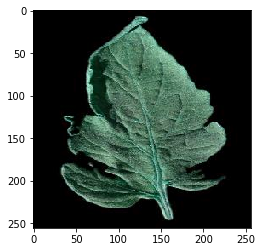

In [10]:
plt.imshow( healthy_images[4] )

In [11]:
len(healthy_images)

1591

In [12]:
# get the image shape
image_shape = healthy_images[0].shape
print( image_shape )

(256, 256, 3)


In [13]:
type(healthy_images)

list

In [14]:
# Convert list to numpy array
healthy_images_np = np.array(healthy_images)
healthy_images_np.shape

(1591, 256, 256, 3)

### Unhealthy Leaf

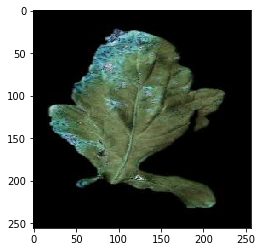

In [15]:
plt.imshow( bacterial_spot_images[4])

In [16]:
len(bacterial_spot_images)

2127

### Combining healthy and unhealthy images

In [17]:
def numpyConverter(images):
    return np.array(images)

In [18]:
healthy_images_np = numpyConverter(healthy_images)
bacterial_spot_images_np = numpyConverter(bacterial_spot_images)
early_blight_images_np = numpyConverter(early_blight_images)
late_blight_images_np = numpyConverter(late_blight_images)
leaf_mold_images_np = numpyConverter(leaf_mold_images)
septoria_leaf_spot_images_np = numpyConverter(septoria_leaf_spot_images)
two_spotted_spider_mites_images_np = numpyConverter(two_spotted_spider_mites_images)
target_spot_images_np = numpyConverter(target_spot_images)
mosaic_virus_images_np = numpyConverter(mosaic_virus_images)
yellow_leaf_curl_virus_images_np = numpyConverter(yellow_leaf_curl_virus_images)

In [19]:
# two_spotted_spider_mites has an image with index 1471 out of shape
print(two_spotted_spider_mites_images_np.shape)
print(two_spotted_spider_mites_images_np[1470].shape)
print(two_spotted_spider_mites_images_np[1471].shape)

(1676,)
(256, 256, 3)
(512, 335, 3)


In [20]:
# remove the 1471 index file image
del two_spotted_spider_mites_images[1471]

In [21]:
two_spotted_spider_mites_images_np = numpyConverter(two_spotted_spider_mites_images)

In [22]:
print(two_spotted_spider_mites_images_np.shape)

(1675, 256, 256, 3)


In [23]:
all_images_np = np.concatenate( (healthy_images_np, bacterial_spot_images_np,
                                 early_blight_images_np, late_blight_images_np, 
                                 leaf_mold_images_np, septoria_leaf_spot_images_np, 
                                 two_spotted_spider_mites_images_np, target_spot_images_np,
                                 mosaic_virus_images_np, yellow_leaf_curl_virus_images_np), axis = 0 )

In [24]:
all_images_np.shape

(18159, 256, 256, 3)

In [25]:
len(all_images_np)

18159

### Creating labels array

In [26]:
y_labels = [0] * len(healthy_images) + [1] * len(bacterial_spot_images) + \
           [2] * len(early_blight_images) + [3] * len(late_blight_images) + \
           [4] * len(leaf_mold_images) + [5] * len(septoria_leaf_spot_images) + \
           [6] * len(two_spotted_spider_mites_images) + [7] * len(target_spot_images) + \
           [8] * len(mosaic_virus_images) + [9] * len(yellow_leaf_curl_virus_images)
        
len(y_labels)

18159

In [27]:
# Convert labels to numpy array
y_labels_np = np.array( y_labels )

y_labels_np

array([0, 0, 0, ..., 9, 9, 9])

In [28]:
from keras.utils import np_utils

# convert integers to one hot encoded
y_one_hot_encoded = np_utils.to_categorical(y_labels_np)

Using TensorFlow backend.
/opt/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [29]:
print(type(y_one_hot_encoded))
print(y_one_hot_encoded.shape)
y_one_hot_encoded

<class 'numpy.ndarray'>
(18159, 10)


array([[ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  1.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.]])

## Splitting train and test

In [30]:
len(all_images_np)

18159

In [31]:
import random

all_indexes = list( range(len(all_images_np)) )
sample_indexes = random.sample( all_indexes, 10000 )
test_indexes = random.sample( sample_indexes, 1000 )
train_indexes = list( set( sample_indexes ) - set( test_indexes ) )

In [32]:
# Checking the distribution of data
from collections import Counter

# Original dist
print("Original:",Counter(y_labels))
# Sampled dist
y_dist = y_labels_np[train_indexes]
print("Sampled:",Counter(y_dist))

Original: Counter({9: 5357, 1: 2127, 3: 1909, 5: 1771, 6: 1675, 0: 1591, 7: 1404, 2: 1000, 4: 952, 8: 373})
Sampled: Counter({9: 2629, 1: 1022, 3: 938, 5: 880, 6: 864, 0: 796, 7: 695, 2: 511, 4: 481, 8: 184})


In [33]:
## Train images
X_train = all_images_np[train_indexes]
y_train = y_one_hot_encoded[train_indexes]

## Test images
X_test = all_images_np[test_indexes]
y_test = y_one_hot_encoded[test_indexes]

### Sanity Check

In [34]:
def sanity_checker( idx ):
    plt.imshow( X_train[idx] );
    plt.show();
    print( y_train[idx])

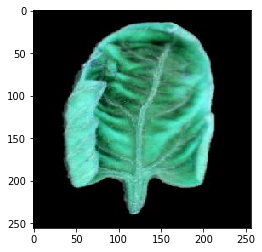

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]


In [35]:
sanity_checker( 8400 )

## Build the model for Classifying all tomato categories 

In [36]:
import keras
import tensorflow as tf
from keras import backend as K

In [37]:
# import necessary building blocks
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, Input
from keras.layers.advanced_activations import LeakyReLU

In [38]:
# normalize inputs
X_train_norm = (X_train/255) - 0.5
X_test_norm = (X_test/255) - 0.5

### function: train and test accuracy plot

In [39]:
def plot_train_val_accuracy(hist):
    plt.plot(hist['acc'])
    plt.plot(hist['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

### function: train and test loss plot

In [40]:
def plot_train_val_loss(hist):
    plt.plot(hist['loss'])
    plt.plot(hist['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

### Model: Use pre-built networks via transfer learning

** Architecture **
- Conv -> Maxpool -> Conv-> Maxpool -> Maxpool -> Conv -> Maxpool -> Softmax

** Optimizer **

- Adam
- Batch size = 256
- Epoch = 20

In [41]:
K.clear_session()  # clear default graph

model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(3,3), strides=1, padding='same', input_shape=image_shape))
model.add(LeakyReLU(0.1))
                            
model.add(MaxPooling2D(pool_size=(3, 3)))

model.add(Conv2D(filters=32, kernel_size=(3,3), strides=1, padding='same', input_shape=image_shape))
model.add(LeakyReLU(0.1))
                            
model.add(MaxPooling2D(pool_size=(3, 3)))

model.add(Conv2D(filters=64, kernel_size=(3,3), strides=1, padding='same', input_shape=image_shape))
model.add(LeakyReLU(0.1))
                            
model.add(MaxPooling2D(pool_size=(3, 3)))

model.add(Flatten())
    
model.add(Dense(256))
model.add(LeakyReLU(0.1))
#model.add(Dropout(0.5))

model.add(Dense(64))
model.add(LeakyReLU(0.1))
#model.add(Dropout(0.5))

model.add(Dense(10))
model.add(Activation('softmax'))

In [42]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 256, 256, 16)      448       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 256, 256, 16)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 85, 85, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 85, 85, 32)        4640      
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 85, 85, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 64)        18496     
__________

In [43]:
model.compile(optimizer='adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

BATCH_SIZE = 128
EPOCHS = 20

history = model.fit(
    X_train_norm, 
    y_train,  # prepared data
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(X_test_norm, y_test),
    verbose=1
)

Train on 9000 samples, validate on 1000 samples
Epoch 1/20
9000/9000 [==============================] - 172s 19ms/step - loss: 1.3753 - acc: 0.5430 - val_loss: 0.9282 - val_acc: 0.6970
Epoch 2/20
9000/9000 [==============================] - 173s 19ms/step - loss: 0.7258 - acc: 0.7561 - val_loss: 0.5989 - val_acc: 0.8060
Epoch 3/20
9000/9000 [==============================] - 173s 19ms/step - loss: 0.5410 - acc: 0.8160 - val_loss: 0.5161 - val_acc: 0.8160
Epoch 4/20
9000/9000 [==============================] - 173s 19ms/step - loss: 0.3988 - acc: 0.8649 - val_loss: 0.4938 - val_acc: 0.8230
Epoch 5/20
9000/9000 [==============================] - 173s 19ms/step - loss: 0.3203 - acc: 0.8929 - val_loss: 0.4190 - val_acc: 0.8600
Epoch 6/20
9000/9000 [==============================] - 173s 19ms/step - loss: 0.2557 - acc: 0.9110 - val_loss: 0.4127 - val_acc: 0.8570
Epoch 7/20
9000/9000 [==============================] - 173s 19ms/step - loss: 0.1981 - acc: 0.9324 - val_loss: 0.2939 - val_acc: 

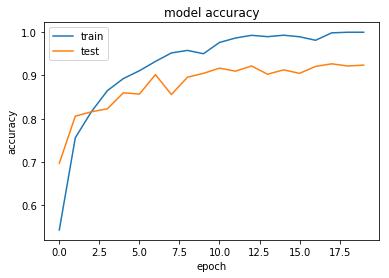

In [44]:
plot_train_val_accuracy(history.history)

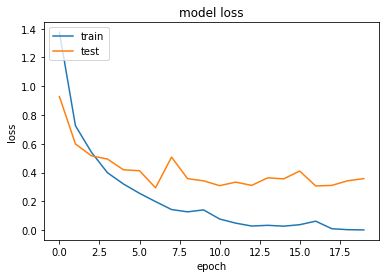

In [45]:
plot_train_val_loss(history.history)

In [46]:
print(history.history['val_acc'])

[0.6970000023841858, 0.80600000143051143, 0.81600000143051143, 0.82299999809265134, 0.86000000095367435, 0.85700000047683711, 0.90200000000000002, 0.85599999809265137, 0.89600000095367427, 0.90499999856948854, 0.91699999761581419, 0.90999999761581418, 0.92200000000000004, 0.90299999952316279, 0.91300000238418577, 0.90500000238418576, 0.92099999856948855, 0.9269999976158142, 0.92199999761581419, 0.92399999761581419]


### Model 2: Handling overfitting as Model 1 + dropout

In [53]:
K.clear_session()  # clear default graph

model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(3,3), strides=1, padding='same', input_shape=image_shape))
model.add(LeakyReLU(0.1))
                            
model.add(MaxPooling2D(pool_size=(3, 3)))

model.add(Conv2D(filters=32, kernel_size=(3,3), strides=1, padding='same', input_shape=image_shape))
model.add(LeakyReLU(0.1))
                            
model.add(MaxPooling2D(pool_size=(3, 3)))

model.add(Conv2D(filters=64, kernel_size=(3,3), strides=1, padding='same', input_shape=image_shape))
model.add(LeakyReLU(0.1))
                            
model.add(MaxPooling2D(pool_size=(3, 3)))

model.add(Flatten())
    
model.add(Dense(256))
model.add(LeakyReLU(0.1))
model.add(Dropout(0.5))

model.add(Dense(64))
model.add(LeakyReLU(0.1))
model.add(Dropout(0.5))

model.add(Dense(10))
model.add(Activation('softmax'))

In [54]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 256, 256, 16)      448       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 256, 256, 16)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 85, 85, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 85, 85, 32)        4640      
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 85, 85, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 64)        18496     
__________

In [55]:
model.compile(optimizer='adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

BATCH_SIZE = 128
EPOCHS = 30

history = model.fit(
    X_train_norm, 
    y_train,  # prepared data
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(X_test_norm, y_test),
    verbose=1
)

Train on 9000 samples, validate on 1000 samples
Epoch 1/30
9000/9000 [==============================] - 172s 19ms/step - loss: 1.7059 - acc: 0.4203 - val_loss: 1.0491 - val_acc: 0.6670
Epoch 2/30
9000/9000 [==============================] - 172s 19ms/step - loss: 1.1029 - acc: 0.6310 - val_loss: 0.7404 - val_acc: 0.7500
Epoch 3/30
9000/9000 [==============================] - 172s 19ms/step - loss: 0.8271 - acc: 0.7334 - val_loss: 0.5641 - val_acc: 0.8190
Epoch 4/30
9000/9000 [==============================] - 172s 19ms/step - loss: 0.6782 - acc: 0.7756 - val_loss: 0.4881 - val_acc: 0.8320
Epoch 5/30
9000/9000 [==============================] - 172s 19ms/step - loss: 0.5606 - acc: 0.8181 - val_loss: 0.4737 - val_acc: 0.8580
Epoch 6/30
9000/9000 [==============================] - 172s 19ms/step - loss: 0.4852 - acc: 0.8429 - val_loss: 0.3463 - val_acc: 0.8910
Epoch 7/30
9000/9000 [==============================] - 172s 19ms/step - loss: 0.4159 - acc: 0.8612 - val_loss: 0.3607 - val_acc: 

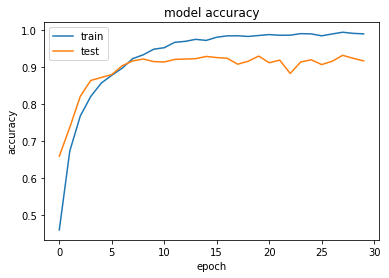

In [52]:
plot_train_val_accuracy(history.history)

In [ ]:
plot_train_val_loss(history.history)

### Model: Use pre-built networks via transfer learning

** Architecture **
- VGG16

** Optimizer **

- Adam
- Batch size = 256
- Epoch = 20

In [47]:
# from keras.applications import VGG16

# # Loading the pre-trained weights
# K.clear_session()

# conv_model = VGG16(weights='imagenet',
#                   include_top=False, # Download only the conv network while skip the last two fully connected layers
#                   input_shape=image_shape)

# # Model summary
# conv_model.summary()
# # Freeze the layers 
# for layer in conv_model.layers:
#     layer.trainable = False
    
# # Add the custom layers to the top of the network
# x = conv_model.output # this has a shape of (None, 8, 8, 512)

# x = Flatten()(x) # flatten the output from the conv net of vgg16
# x = Dense(128, activation = "relu")(x)
# #x = Dropout(0.5)(x)
# x = Dense(64, activation = "relu")(x)
# #x = Dropout(0.5)(x)
# outputs = Dense(10, activation = 'softmax')(x)

# vgg16_model = Model(input = conv_model.input, output = outputs)

# # Final model summary
# vgg16_model.summary()

# vgg16_model.compile(optimizer = 'adam',
#               loss = 'categorical_crossentropy',
#               metrics = ['accuracy'])

# BATCH_SIZE = 256
# EPOCHS = 10

# history = vgg16_model.fit(
#     X_train_norm, 
#     y_train,  # prepared data
#     batch_size=BATCH_SIZE,
#     epochs=EPOCHS,
#     validation_data=(X_test_norm, y_test),
#     verbose=1
# )